In [1]:
%matplotlib inline
from matplotlib.pylab import *
import gc
rcParams['figure.figsize'] = (12,8)
rcParams['font.size'] = 18

In [2]:
import pynbody
import pynbody.plot.sph as sph
pynbody.ramses.multiprocess_num = 12
pynbody.config['number_of_threads'] = 32

In [3]:
s = pynbody.load('./output_00016')

## Look at the # of number of star, gas (cells) and DM particles

### Note that in pynbody everything is considered a 'particle' -- i.e. - cells become particles in this model

In [4]:
s.properties

{'a': 0.0588261160837484,
 'boxsize': Unit("7.66e+23 cm"),
 'h': 0.71,
 'omegaL0': 0.732999980449677,
 'omegaM0': 0.266999989748001,
 'time': Unit("2.53e-01 Gyr")}

In [5]:
s.properties['boxsize'].in_units('kpc')

248.10350248466546

In [6]:
s.properties['boxsize'].in_units('kpc')*0.71/s.properties['a']

2994.4775975576863

In [7]:
len(s.stars),len(s.gas),len(s.dm)

(2310, 185427511, 134217728)

### Actually load the data. This is done when you ask for the data.

In [8]:
s['pos'];

In [10]:
s.g['cs']

TypeError: unsupported operand type(s) for /: 'float' and 'NamedUnit'

In [19]:
s.g['vt']

SimArray([ 16.09862817,  16.5248355 ,  17.03765989, ...,  13.68181579,
        12.08150886,  12.3852695 ], 'km s**-1')

In [11]:
s.properties

{'a': 0.0588261160837484,
 'boxsize': Unit("7.66e+23 cm"),
 'h': 0.71,
 'omegaL0': 0.732999980449677,
 'omegaM0': 0.266999989748001,
 'time': Unit("2.53e-01 Gyr")}

### Print z for this output step

In [12]:
z=1/s.properties['a']-1
print ("Redshift for this data %.1f" % z)

Redshift for this data 16.0


In [21]:
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print ("Physical sim-size at this z is %s"%boxsizestring)

Physical sim-size at this z is 338.78 kpc


### Check comoving box size is ... 

In [13]:
s.properties['boxsize'].in_units('kpc') * s.properties['h'] / s.properties['a']

2994.4775975576863

In [14]:
s.properties['time'].in_units('Myr')

253.49291087559405

# NORMALIZE data coords -- center the values on (0,0,0)

## RAMSES uses particle locations between 0 and 1... Shift this to -0.5 to 0.5

## Do this BEFORE transforming to physical units

In [15]:
s['pos'] -= 0.5

In [16]:
s.physical_units();

## Zero-out metals lower than 10^-8

In [26]:
len(s.gas['metal'][s.gas['metal']< 1.0e-8])

134217728

In [27]:
s.gas['metal'][s.gas['metal']<1e-8]=1.0e-8

In [28]:
len(s.gas['metal'][s.gas['metal']< 1.0e-8])

0

In [29]:
max(s.gas['metal'])

1e-08

In [30]:
min(s.gas['pgf']),len(s.gas['pgf'])

(1.0, 134217728)

## Plot the metals in a slice at the center of the simulation box

#### Remember - you get a slice at box-center unless you ask for something else... 

In [31]:
boxsizestring

'338.78 kpc'

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.snapshot:Deriving array mass
INFO:pynbody.sph:Rendering image on 16 threads...


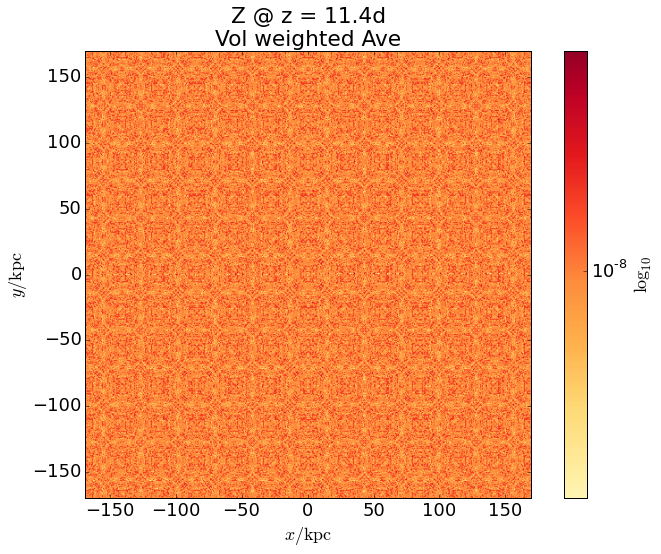

In [32]:
titleStr = "Z @ z = %.1fd" % z + "\nVol weighted Ave"
sph.image(s.g,qty="metal",width=boxsizestring,cmap="YlOrRd",  av_z=True, denoise=False ,
          approximate_fast=False,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...


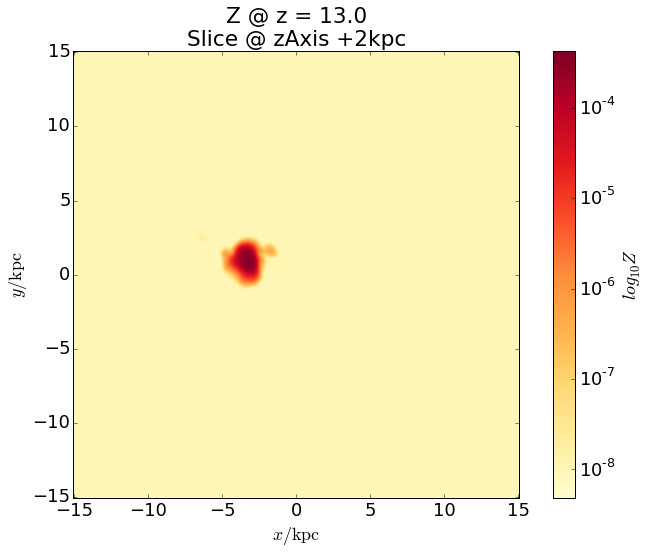

In [49]:
with pynbody.transformation.translate(s,[0,0,2]):
    titleStr = "Z @ z = %.1f" % z + "\nSlice @ zAxis +2kpc"
    sph.image(s.g,qty="metal",width=boxsizestring,cmap="YlOrRd", av_z=False, denoise=False ,qtytitle="${log_{10} Z}$"
              ,approximate_fast=False,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...


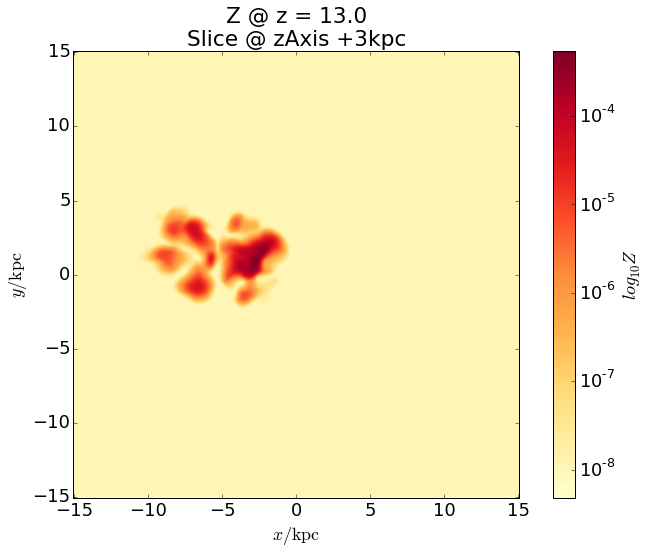

In [51]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Z @ z = %.1f" % z + "\nSlice @ zAxis +3kpc"
    sph.image(s.g,qty="metal",width=boxsizestring,cmap="YlOrRd", av_z=False, denoise=False ,qtytitle="${log_{10} Z}$"
              ,approximate_fast=False,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...


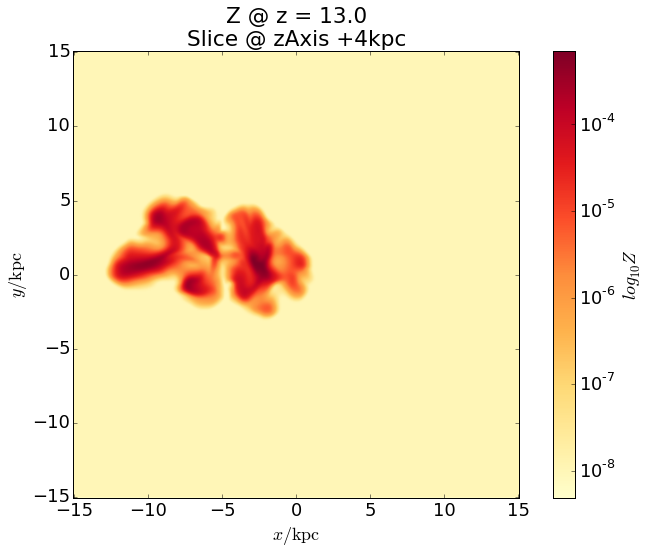

In [52]:
with pynbody.transformation.translate(s,[0,0,4]):
    titleStr = "Z @ z = %.1f" % z + "\nSlice @ zAxis +4kpc"
    sph.image(s.g,qty="metal",width=boxsizestring,cmap="YlOrRd", av_z=False, denoise=False ,qtytitle="${log_{10} Z}$",
              approximate_fast=False,title=titleStr);

### Look at the Pristine Gas Fraction scalar for the gas

INFO:pynbody.sph:Rendering image on 16 threads...


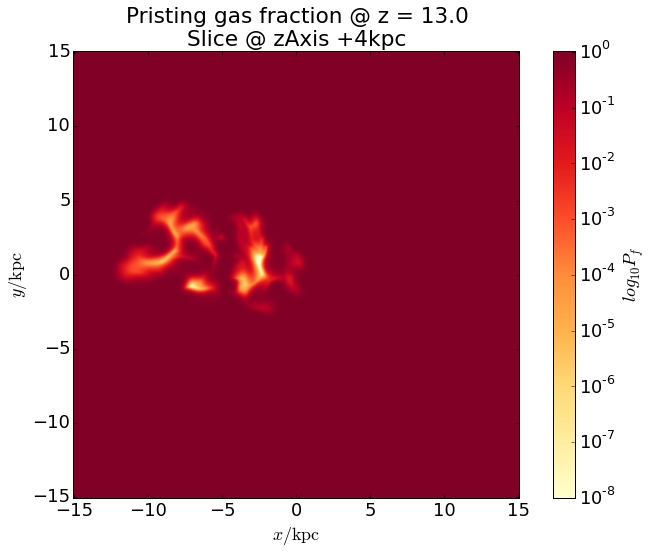

In [53]:
with pynbody.transformation.translate(s,[0,0,4]):
    titleStr = "Pristing gas fraction @ z = %.1f" % z + "\nSlice @ zAxis +4kpc"
    sph.image(s.g,qty="pgf",width=boxsizestring,cmap="YlOrRd", av_z=False, denoise=False ,qtytitle="${log_{10} P_f}$",
              approximate_fast=False,title=titleStr);

In [54]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Pristing gas fraction @ z = %.1f" % z + "\nSlice @ zAxis +3kpc"
    sph.image(s.g,qty="pgf",width=boxsizestring,cmap="YlOrRd", av_z=False, denoise=False ,qtytitle="${log_{10} P_f}$",
              approximate_fast=False,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...


INFO:pynbody.sph:Rendering image on 16 threads...


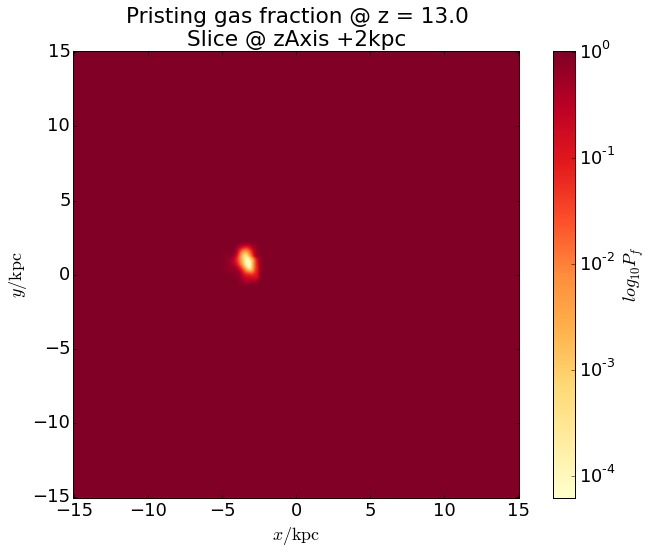

In [55]:
with pynbody.transformation.translate(s,[0,0,2]):
    titleStr = "Pristing gas fraction @ z = %.1f" % z + "\nSlice @ zAxis +2kpc"
    sph.image(s.g,qty="pgf",width=boxsizestring,cmap="YlOrRd", av_z=False, denoise=False ,qtytitle="${log_{10} P_f}$",
              approximate_fast=False,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


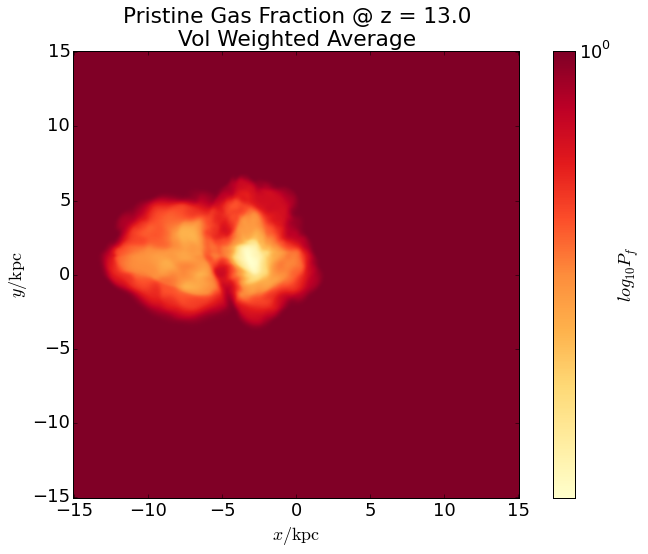

In [56]:
titleStr = "Pristine Gas Fraction @ z = %.1f" % z + "\nVol Weighted Average"
sph.image(s.g,qty="pgf",width=boxsizestring,cmap="YlOrRd", av_z=True, qtytitle="${log_{10} P_f}$", denoise=False ,
          approximate_fast=False,title=titleStr);

## Other plots

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


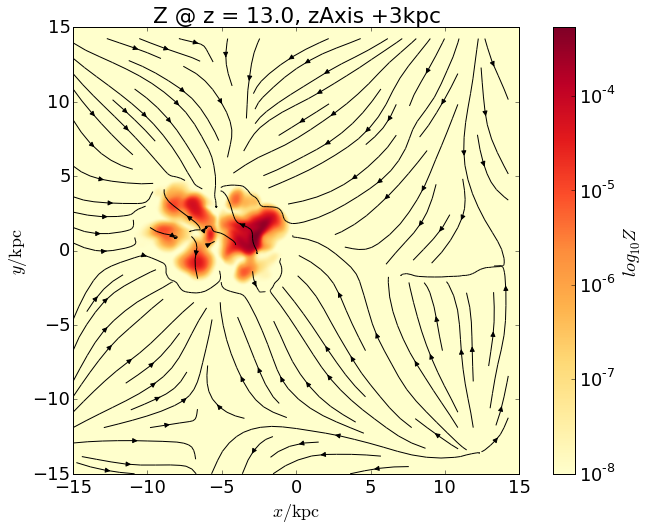

In [88]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Z @ z = %.1f" % z + ", zAxis +3kpc"
    sph.velocity_image(s.g, qty="metal", width='30 kpc', cmap = "YlOrRd", mode='stream', qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, 
                   show_cbar=True, vector_color='black',title=titleStr)


INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


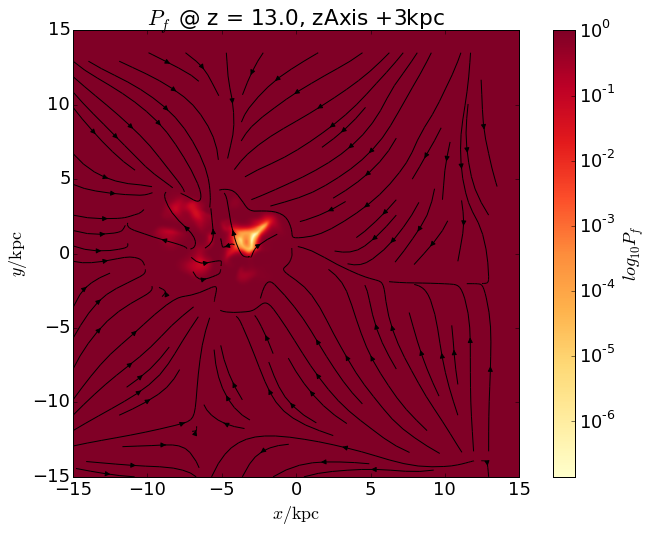

In [89]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "$P_f$ @ z = %.1f" % z + ", zAxis +3kpc"
    sph.velocity_image(s.g, qty="pgf", width='30 kpc', cmap = "YlOrRd", mode='stream', qtytitle="${log_{10} P_f}$",
                   density = 1.0, vector_resolution=20,
                   show_cbar=True, vector_color='black',title=titleStr)

In [90]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Z @ z = %.1f" % z + ", zAxis +3kpc"
    sph.velocity_image(s.g, qty="metal", width='30 kpc', cmap = "YlOrRd", mode='quiver', qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, 
                   show_cbar=True, vector_color='black',title=titleStr)

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


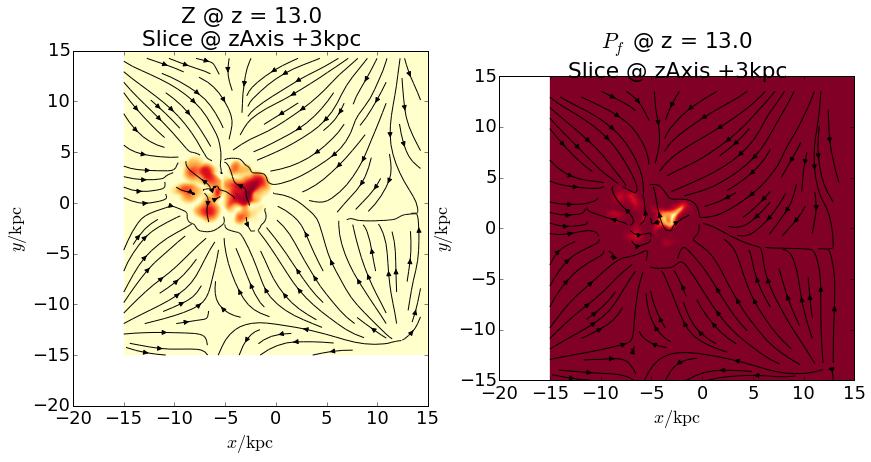

In [84]:
f, axs = plt.subplots(1,2,figsize=(14,9))
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Z @ z = %.1f" % z + "\nSlice @ zAxis +3kpc"
    sph.velocity_image(s.g, qty="metal", width='30 kpc', cmap = "YlOrRd", mode='stream', qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, subplot=axs[0],
                   show_cbar=False, vector_color='black',title=titleStr)
    titleStr = "$P_f$ @ z = %.1f" % z + "\nSlice @ zAxis +3kpc"
    sph.velocity_image(s.g, qty="pgf", width='30 kpc', cmap = "YlOrRd", mode='stream', qtytitle="${log_{10} P_f}$",
                   density = 1.0, vector_resolution=20, subplot=axs[1],
                   show_cbar=False, vector_color='black',title=titleStr)

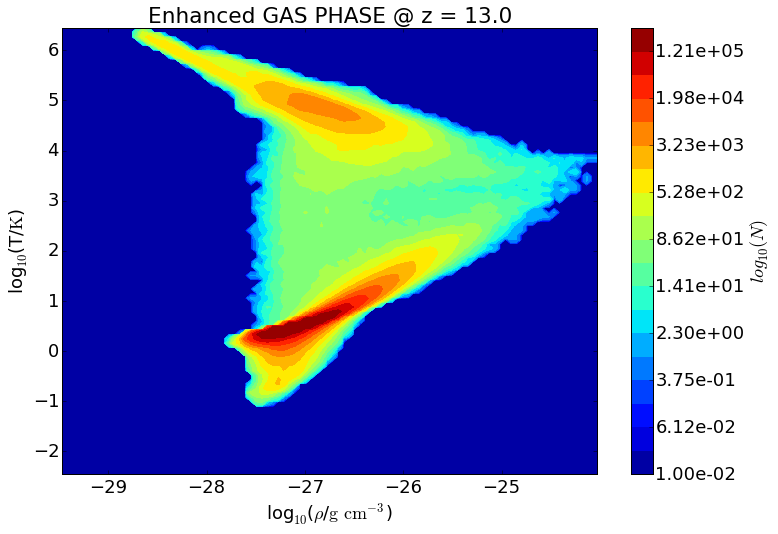

In [62]:
titleStr = "Enhanced GAS PHASE @ z = %.1f" % z
pynbody.plot.gas.rho_T(s.g,rho_units='g cm**-3', rho_range=(-29.5,-24.), t_range=(-2.5,6.5), 
                       colorbar=True, scalemin=0.01, scalemax=3.0e5);
matplotlib.pylab.title(titleStr)

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


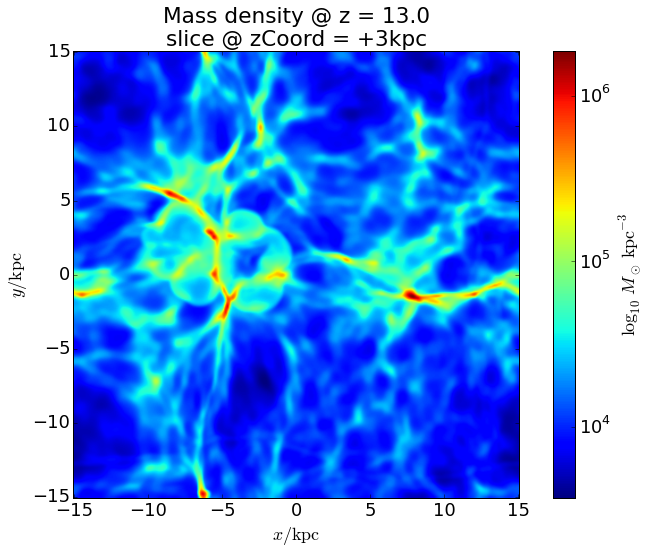

In [118]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Mass density @ z = %.1f" % z + "\nslice @ zCoord = +3kpc"
    pynbody.plot.image(s.g,width=boxsizestring, center=True, cmap=cm.jet,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


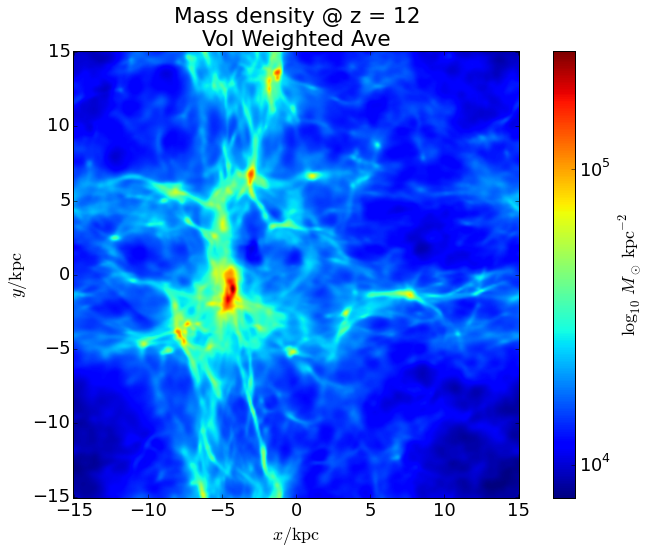

In [30]:
#Projected Mass density on entire box - note units
titleStr = "Mass density @ z = %.1f" % z + "\nVol Weighted Ave"
pynbody.plot.image(s.g,width=boxsizestring, units='Msol kpc^-2', center=True, cmap=cm.jet,title=titleStr);

# Plot the turbulent Mach #

In [39]:
s.g['tv']

SimArray([ 0.45609685,  0.80120609,  0.5850038 , ...,  0.57393478,
        0.51274054,  0.66042852], 'km s**-1')

In [46]:
s.g['tv'][s.g['tv']<0.01].size

0

In [40]:
s.g['cs']

INFO:pynbody.snapshot:Deriving array cs
INFO:pynbody.snapshot:Deriving array temp
INFO:pynbody.snapshot:Deriving array mu
/Users/earnric/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/derived.py:218: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(5.0 * units.k * self['temp'] / self['mu'] / units.m_p)
INFO:pynbody.snapshot:Converting temp units from 2.24e+00 K**1/2 k**1/2 m_p**-1/2 to km s**-1


SimArray([ 0.2768881 ,  0.27450766,  0.27408443, ...,  0.43736034,
        0.3775891 ,  0.32702911], 'km s**-1')

In [47]:
s.g['cs'][s.g['cs']<0.01].size

/Users/earnric/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/array.py:666: RuntimeWarning: invalid value encountered in less
  return comparison_op(ar, other)


1

## Defining a new quantity to plot

In [91]:
s.g['M']=s.g['cs']/s.g['tv']

INFO:pynbody.snapshot:Deriving array cs
INFO:pynbody.snapshot:Deriving array mu
INFO:pynbody.snapshot:Converting temp units from 2.24e+00 K**1/2 k**1/2 m_p**-1/2 to km s**-1


INFO:pynbody.sph:Rendering image on 16 threads...


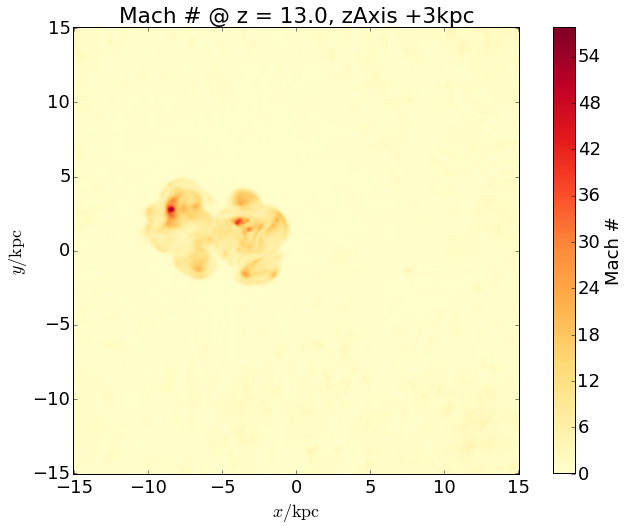

In [100]:
with pynbody.transformation.translate(s,[0,0,3]):
        titleStr = "Mach # @ z = %.1f" % z + ", zAxis +3kpc"
        sph.image(s.g,qty="M",width=boxsizestring,cmap="YlOrRd", av_z=False, qtytitle="Mach #", denoise=False ,
              approximate_fast=False, log=False,  title=titleStr);


INFO:pynbody.sph:Rendering image on 16 threads...


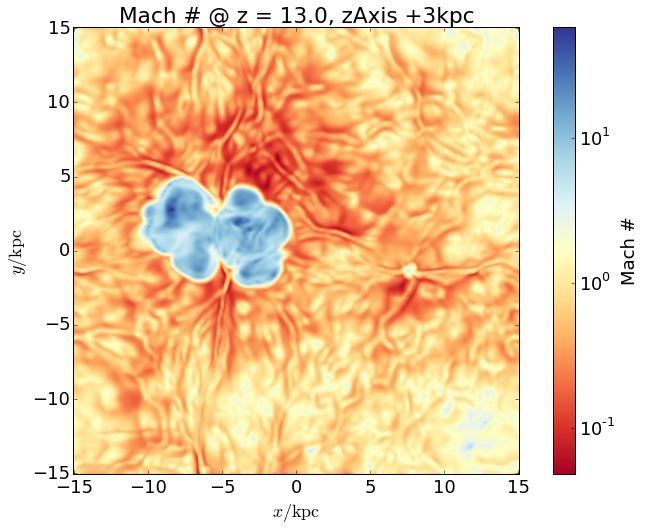

In [116]:
with pynbody.transformation.translate(s,[0,0,3]):
        titleStr = "Mach # @ z = %.1f" % z + ", zAxis +3kpc"
        sph.image(s.g,qty="M",width=boxsizestring,cmap='RdYlBu', av_z=False, qtytitle="Mach #", denoise=False ,
              approximate_fast=False, log=True,  title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


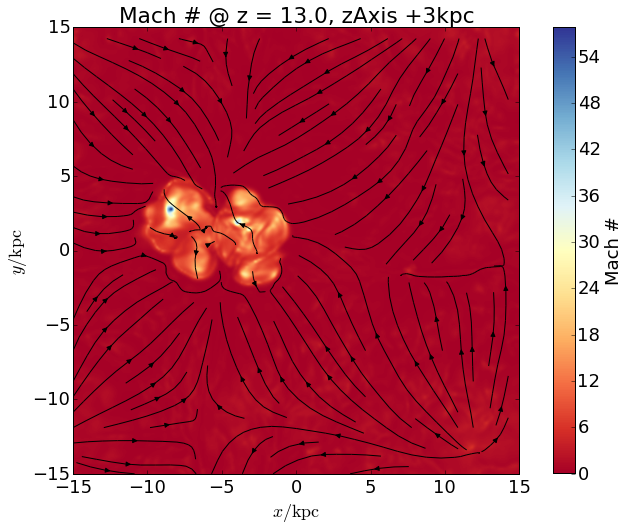

In [115]:
with pynbody.transformation.translate(s,[0,0,3]):
        titleStr = "Mach # @ z = %.1f" % z + ", zAxis +3kpc"
        sph.velocity_image(s.g,qty="M",width='30 kpc',cmap='RdYlBu', av_z=False, 
                           mode='stream', qtytitle="Mach #", denoise=False ,approximate_fast=False, 
                           log=False,  title=titleStr);


## Plot temperature data

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


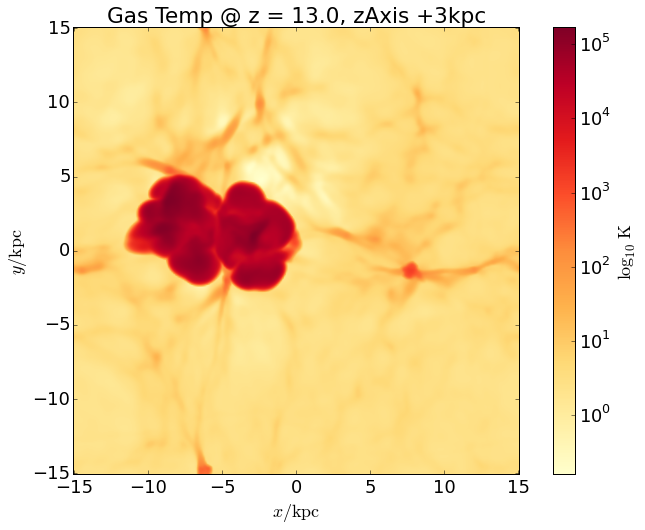

In [120]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Gas Temp @ z = %.1f" % z + ", zAxis +3kpc"
    sph.image(s.g,qty="temp",width=boxsizestring,cmap="YlOrRd", denoise=True ,av_z=False,
              approximate_fast=False,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


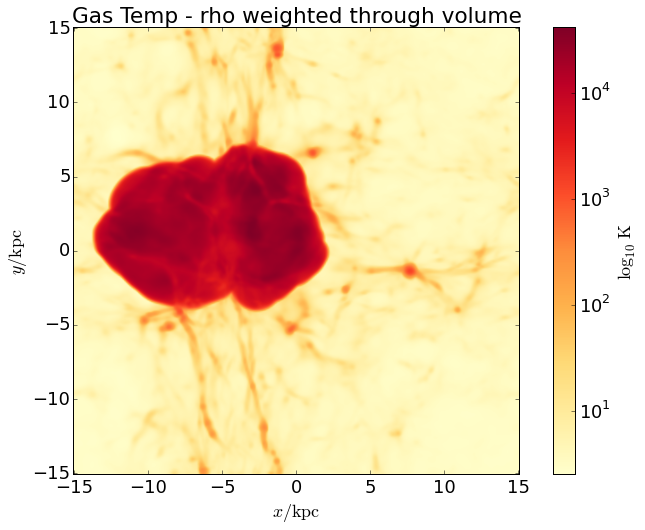

In [122]:
sph.image(s.g,qty="temp",width=boxsizestring,cmap="YlOrRd", denoise=True ,av_z="rho",
          approximate_fast=False,title="Gas Temp - rho weighted through volume");

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


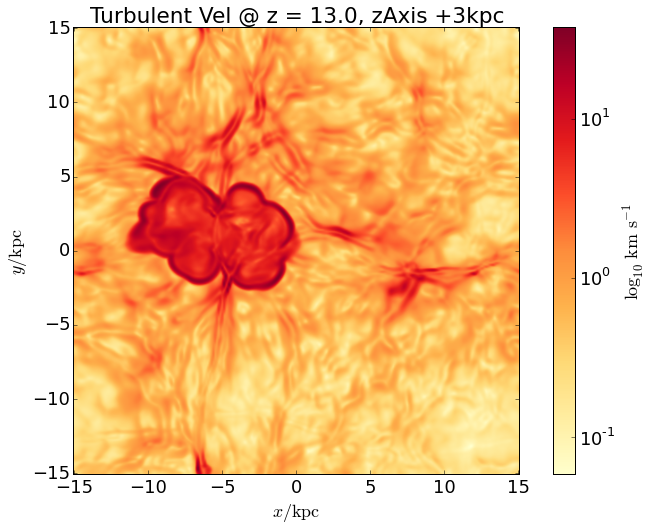

In [123]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Turbulent Vel @ z = %.1f" % z + ", zAxis +3kpc"
    sph.image(s.g,qty="tv",width=boxsizestring,cmap="YlOrRd", denoise=True ,av_z=False,
              approximate_fast=False,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.sph:Rendering image on 16 threads...


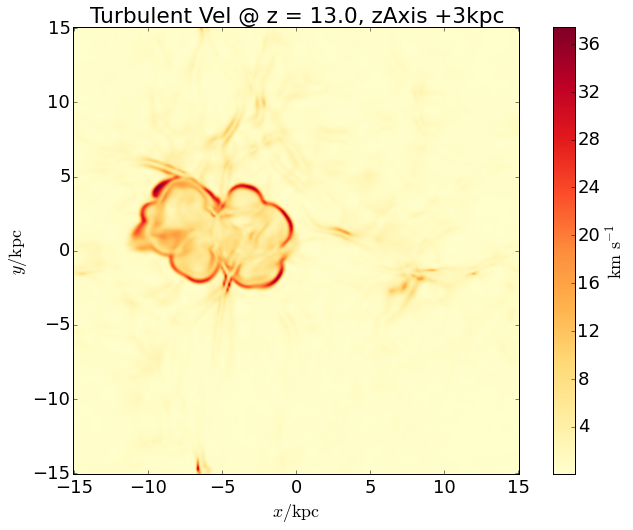

In [124]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Turbulent Vel @ z = %.1f" % z + ", zAxis +3kpc"
    sph.image(s.g,qty="tv",width=boxsizestring,cmap="YlOrRd", denoise=True ,av_z=False,log=False,
              approximate_fast=False,title=titleStr);

INFO:pynbody.sph:Rendering image on 16 threads...
INFO:pynbody.snapshot:Deriving array vt
INFO:pynbody.snapshot:Deriving array v2
INFO:pynbody.snapshot:Deriving array vr
INFO:pynbody.snapshot:Deriving array r
INFO:pynbody.sph:Rendering image on 16 threads...


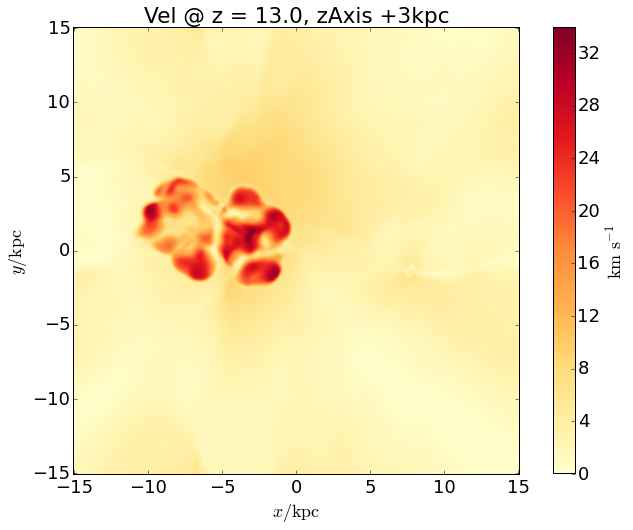

In [129]:
with pynbody.transformation.translate(s,[0,0,3]):
    titleStr = "Vel @ z = %.1f" % z + ", zAxis +3kpc"
    sph.image(s.g, qty="vt",width=boxsizestring,cmap="YlOrRd", denoise=True ,av_z=False,log=False,
              approximate_fast=False,title=titleStr);

In [140]:
titleStr = "Stars @ z = %.1f" % z

pynbody.plot.stars.schmidtlaw (s.s);

INFO:pynbody.analysis.angmom:Finding halo center...
INFO:pynbody.analysis._com:Initial rough COM=[-4.29377601  1.15414276 -6.65437408]
INFO:pynbody.analysis.halo:Final SSC=[-4.29377601  1.15414276 -6.65437408]
INFO:pynbody.analysis.angmom:... cen=[-4.29377601  1.15414276 -6.65437408]
INFO:pynbody.analysis.halo:Finding halo velocity center...


ValueError: Insufficient particles around center to get velocity

In [126]:
s.s.all_keys()

['tform',
 'mass',
 'temp',
 'r_mag',
 'i_mag',
 'K_lum_den',
 'vtheta',
 'U_lum_den',
 'vcxy',
 'j2',
 'I_lum_den',
 'u_mag',
 'cs',
 'vr',
 'vt',
 'H_lum_den',
 'V_lum_den',
 'alt',
 'i_lum_den',
 'u',
 'mu',
 'az',
 'I_mag',
 'vrxy',
 'u_lum_den',
 'J_lum_den',
 'k_mag',
 'v_mag',
 'U_mag',
 'v_mean',
 'h_lum_den',
 'v_lum_den',
 'theta',
 'b_mag',
 'zeldovich_offset',
 'j_mag',
 'B_lum_den',
 'jz',
 'j_lum_den',
 'K_mag',
 'V_mag',
 'v2',
 'J_mag',
 'rho',
 'H_mag',
 'h_mag',
 'B_mag',
 'aform',
 'k_lum_den',
 'te',
 'b_lum_den',
 'temp',
 'ke',
 'age',
 'j',
 'smooth',
 'rxy',
 'p',
 'r',
 'R_lum_den',
 'vphi',
 'r_lum_den',
 'R_mag',
 'v_disp',
 'x',
 'y',
 'z',
 'vx',
 'vy',
 'vz',
 'mass',
 'iord',
 'level',
 'tform',
 'metal',
 'pf']